In [10]:
import torch
import torch.nn as nn

from utils import HParams, get_data, show_example
from train import train_cycle
from test import test_cycle
import baseline_models
import packed_models

In [11]:
hparams = HParams()
train_loader, val_loader = get_data(hparams)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


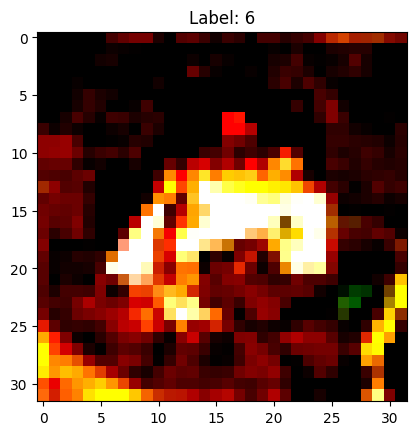

In [12]:
show_example(train_loader, 0)

In [13]:
limit = 2048

train_loader.dataset.data = train_loader.dataset.data[:limit]
train_loader.dataset.targets = train_loader.dataset.targets[:limit]

val_loader.dataset.data = val_loader.dataset.data[:limit//8]
val_loader.dataset.targets = val_loader.dataset.targets[:limit//8]

In [14]:
baseline_model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)
baseline_model.fc = nn.Linear(512, 10)

packed_model = packed_models.PackedResNet18(alpha=2, gamma=2, n_estimators=4)
baseline_model_scratch = baseline_models.ResNet18()

Using cache found in /home/tomas/.cache/torch/hub/pytorch_vision_v0.10.0


In [17]:
for i, (images, labels) in enumerate(train_loader):
    print(images.shape)
    print(labels.shape)

    out = packed_model(images)

    print(out.shape)

    break

torch.Size([128, 3, 32, 32])
torch.Size([128])
torch.Size([128, 40])


In [15]:
train_cycle(baseline_model_scratch, hparams, train_loader, val_loader)

KeyboardInterrupt: 

In [ ]:
acc, ece, aupr, auc = test_cycle(baseline_model, val_loader)
print(f'Baseline Model:')
print(f'\tAcc: {acc}')
print(f'\tECE: {ece}')
print(f'\tAUPR: {aupr}')
print(f'\tAUC: {auc}')
# print(f'\tFPR95: {fpr95}')

Baseline Model:
	Acc: 0.8183000087738037
	ECE: 0.13695426285266876
	AUPR: 0.9750760793685913
	AUC: 0.9750760793685913
